# 04 -- Digits MNIST - Keras

## Victor Jose Novaes Pires

### 2019-03-14

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [4]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [5]:
from pandas import __version__

print(f"Pandas version: {__version__}")

Pandas version: 0.24.2


In [6]:
from seaborn import __version__

print(f"Seaborn version: {__version__}")

Seaborn version: 0.9.0


In [7]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.3


In [8]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0


## Digits MNIST dataset

In [9]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Feature scaling

In [10]:
import numpy as np

X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [11]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [12]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

### Categorization

In [13]:
classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
from keras.utils import to_categorical

y_train_c = to_categorical(y_train, len(classes))

y_train_c.shape

(60000, 10)

In [15]:
y_train_c[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
y_test_c = to_categorical(y_test, len(classes))

y_test_c.shape

(10000, 10)

### Dataset analysis and equations on: 01 -- Digits MNIST - NumPy

## Stochastic Gradient Descent

In [17]:
from keras.models import Sequential

from keras.layers import Flatten, Dense, Dropout

model = Sequential()

model.add(Flatten())

model.add(Dense(25, activation='sigmoid', input_shape=(784,)))

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [18]:
%%time

model.fit(X_train, y_train_c, epochs=3)

print()

Epoch 1/3
60000/60000 [==============================] - 6s 105us/step - loss: 0.0925 - acc: 0.1111
Epoch 2/3
60000/60000 [==============================] - 6s 102us/step - loss: 0.0907 - acc: 0.1338
Epoch 3/3
60000/60000 [==============================] - 6s 101us/step - loss: 0.0897 - acc: 0.1556

CPU times: user 21.2 s, sys: 23.6 s, total: 44.8 s
Wall time: 18.7 s


### Scores

In [19]:
import NNfromScratch as nnfs

p_train = np.argmax(model.predict(X_train), axis=1)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 24.62%


In [20]:
p_test = np.argmax(model.predict(X_test), axis=1)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 24.47%


# Hyperparameter optimization

## Activations:

### Sigmoid, Scaled Exponential Linear Unit and Rectified Linear Unit

## Dropout

## Optimizers

### Stochastic Gradient Descent and Adam

## Losses

### Mean Squared Error, Categorical Crossentropy and Sparse Categorical Crossentropy

In [21]:
%%time

losses = ['mean_squared_error', 'categorical_crossentropy', 'sparse_categorical_crossentropy']

best = {'Accuracy': 0, 'Activation': None, 'Dropout': None, 'Optimizer': None, 'Loss function': None}

for activation in ['sigmoid', 'selu', 'relu']:
    for dropout in [0.0, 0.1, 0.2]:
        for optimizer in ['sgd', 'adam']:
            for loss in losses:
                print(f"Activation: {activation}\n"
                      f"Dropout: {dropout}\n"
                      f"Optimizer: {optimizer}\n"
                      f"Loss function: {loss}")

                model = Sequential([Flatten(),
                                    Dense(25, activation=activation, input_shape=[784, None]),
                                    Dropout(dropout),
                                    Dense(10, activation='softmax')])

                model.compile(optimizer=optimizer,
                              loss=loss,
                              metrics=['accuracy'])

                if loss == 'sparse_categorical_crossentropy':
                    model.fit(X_train, y_train, epochs=3, verbose=0)
                    loss_train, train_acc = model.evaluate(X_train, y_train, verbose=0)
                    loss_test, test_acc = model.evaluate(X_test, y_test, verbose=0)
                else:
                    model.fit(X_train, y_train_c, epochs=3, verbose=0)
                    loss_train, train_acc = model.evaluate(X_train, y_train_c, verbose=0)
                    loss_test, test_acc = model.evaluate(X_test, y_test_c, verbose=0)

                print(f"Train loss: {loss_train:.5f}\tTrain accuracy: {train_acc*100:.2f}%\n"
                      f"Test loss:  {loss_test:.5f}\tTest accuracy:  {test_acc*100:.2f}%")
                print('-'*50)

                if test_acc > best['Accuracy']:
                    best['Accuracy'] = test_acc
                    best['Activation'] = activation
                    best['Dropout'] = dropout
                    best['Optimizer'] = optimizer
                    best['Loss function'] = loss

print()

Activation: sigmoid
Dropout: 0.0
Optimizer: sgd
Loss function: mean_squared_error
Train loss: 0.08819	Train accuracy: 20.72%
Test loss:  0.08810	Test accuracy:  21.36%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: sgd
Loss function: categorical_crossentropy
Train loss: 0.59487	Train accuracy: 86.83%
Test loss:  0.58075	Test accuracy:  87.39%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: sgd
Loss function: sparse_categorical_crossentropy
Train loss: 0.60776	Train accuracy: 86.35%
Test loss:  0.59079	Test accuracy:  87.27%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: adam
Loss function: mean_squared_error
Train loss: 0.00881	Train accuracy: 94.65%
Test loss:  0.00917	Test accuracy:  94.24%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: adam
Loss function: categorical_crossentropy
Train loss: 0.1

Train loss: 0.30048	Train accuracy: 91.56%
Test loss:  0.29182	Test accuracy:  91.89%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: sgd
Loss function: sparse_categorical_crossentropy
Train loss: 0.30391	Train accuracy: 91.40%
Test loss:  0.29528	Test accuracy:  91.73%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: adam
Loss function: mean_squared_error
Train loss: 0.00707	Train accuracy: 95.57%
Test loss:  0.00773	Test accuracy:  94.91%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: adam
Loss function: categorical_crossentropy
Train loss: 0.15167	Train accuracy: 95.62%
Test loss:  0.16776	Test accuracy:  95.12%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: adam
Loss function: sparse_categorical_crossentropy
Train loss: 0.15625	Train accuracy: 95.40%
Test loss:  0.16780	Test accuracy:  94.97%
---------------

## Best model

In [22]:
print(">>> Best model:")
for k in best.keys():
    print(f">> {k}: {best[k]}")

>>> Best model:
>> Accuracy: 0.9531
>> Activation: selu
>> Dropout: 0.0
>> Optimizer: adam
>> Loss function: sparse_categorical_crossentropy


In [23]:
model = Sequential([Flatten(),
                    Dense(25, activation=best['Activation'], input_shape=[784, None]),
                    Dropout(best['Dropout']),
                    Dense(10, activation='softmax')])

model.compile(optimizer=best['Optimizer'],
              loss=best['Loss function'],
              metrics=['accuracy'])

In [24]:
%%time

if best['Loss function'] == 'sparse_categorical_crossentropy':
    model.fit(X_train, y_train, epochs=50)
else:
    model.fit(X_train, y_train_c, epochs=50)

print()

Epoch 1/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.3754 - acc: 0.8942
Epoch 2/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.2356 - acc: 0.9324
Epoch 3/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1887 - acc: 0.9462
Epoch 4/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.1576 - acc: 0.9541
Epoch 5/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.1375 - acc: 0.9601
Epoch 6/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1231 - acc: 0.9640
Epoch 7/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.1127 - acc: 0.9664
Epoch 8/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1050 - acc: 0.9692
Epoch 9/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.0969 - acc: 0.9709
Epoch 10/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.0918 - a

## Scores

### Training set

In [25]:
p_train = np.argmax(model.predict(X_train), axis=1)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 99.29%


In [26]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 59,576 out of 60,000 images.


In [27]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 424 out of 60,000 images.


### Test set

In [28]:
p_test = np.argmax(model.predict(X_test), axis=1)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 96.07%


In [29]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 9,607 out of 10,000 images.


In [30]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 393 out of 10,000 images.


## Distribution of labels

In [31]:
import pandas as pd

df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])
df['Pred Train'] = np.bincount(p_train.reshape(-1))
df['Train Diff'] = df['Pred Train'] - df['Y Train']
df['Y Test'] = np.bincount(y_test.reshape(-1))
df['Pred Test'] = np.bincount(p_test.reshape(-1))
df['Test Diff'] = df['Pred Test'] - df['Y Test']
df['Y Combined'] = df['Y Train'] + df['Y Test']
df['Pred Combined'] = df['Pred Train'] + df['Pred Test']
df['Combined Diff'] = df['Pred Combined'] - df['Y Combined']
df.index.set_names('Labels', inplace=True)
df

,Y Train,Pred Train,Train Diff,Y Test,Pred Test,Test Diff,Y Combined,Pred Combined,Combined Diff
Labels,,,,,,,,,
0,5923,5987,64,980,997,17,6903,6984,81
1,6742,6748,6,1135,1141,6,7877,7889,12
2,5958,5985,27,1032,1029,-3,6990,7014,24
3,6131,6018,-113,1010,1013,3,7141,7031,-110
4,5842,5872,30,982,996,14,6824,6868,44
5,5421,5415,-6,892,885,-7,6313,6300,-13
6,5918,5915,-3,958,954,-4,6876,6869,-7
7,6265,6324,59,1028,1030,2,7293,7354,61
8,5851,5842,-9,974,952,-22,6825,6794,-31


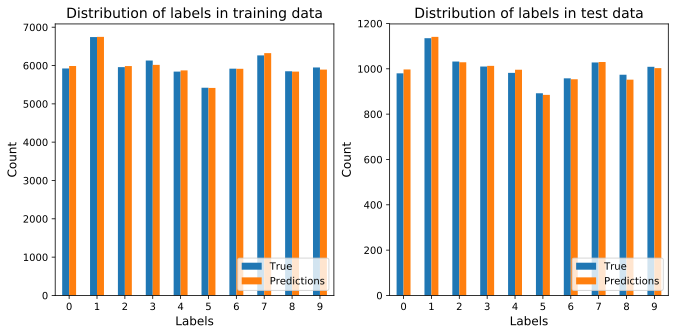

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

df[['Y Train', 'Pred Train']].plot.bar(ax=axes[0], rot=0)
axes[0].set_title("Distribution of labels in training data", fontsize=14)
axes[0].set_xlabel("Labels", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(['True', 'Predictions'], loc='lower right')

df[['Y Test', 'Pred Test']].plot.bar(ax=axes[1], rot=0)
axes[1].set_title("Distribution of labels in test data", fontsize=14)
axes[1].set_xlabel("Labels", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(['True', 'Predictions'], loc='lower right')

plt.show()

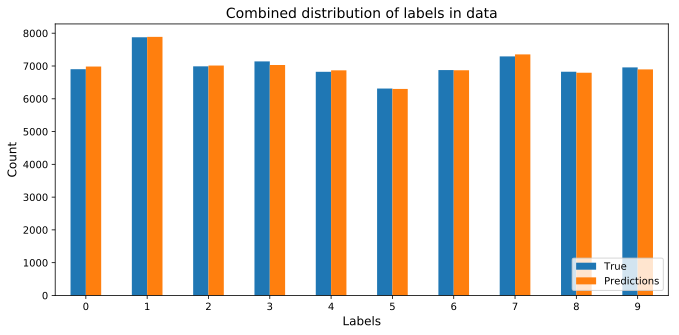

In [33]:
df[['Y Combined', 'Pred Combined']].plot.bar(figsize=(11, 5), rot=0)
plt.title("Combined distribution of labels in data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(['True', 'Predictions'], loc='lower right')
plt.show()

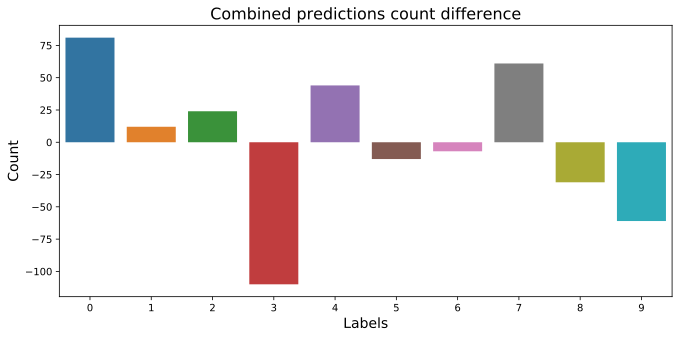

In [34]:
import seaborn as sns

plt.figure(figsize=[11, 5])
sns.barplot(data=df[['Combined Diff']].T)
plt.title("Combined predictions count difference", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

## Correctly classified images

In [35]:
def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {y[indices[i]]} <> Pred: {p[indices[i]]}", fontsize=12)
        ax.set_axis_off()

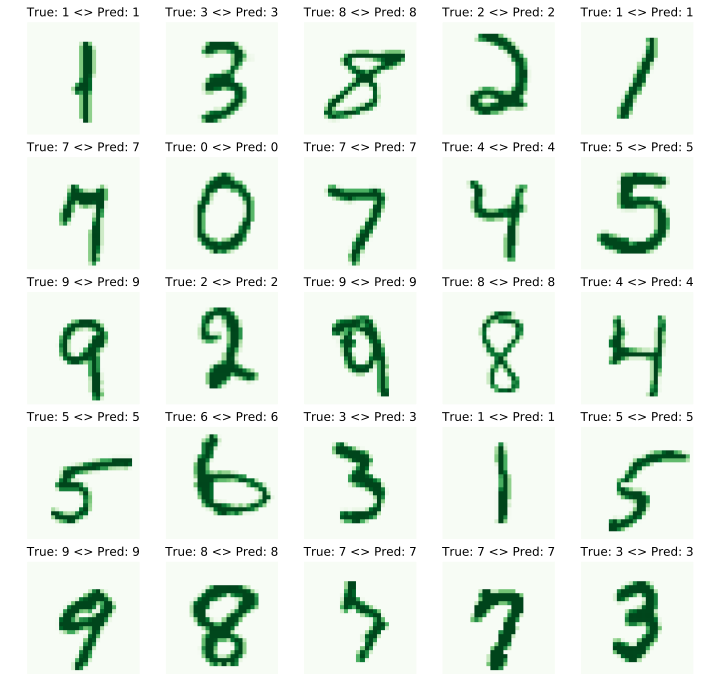

In [36]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

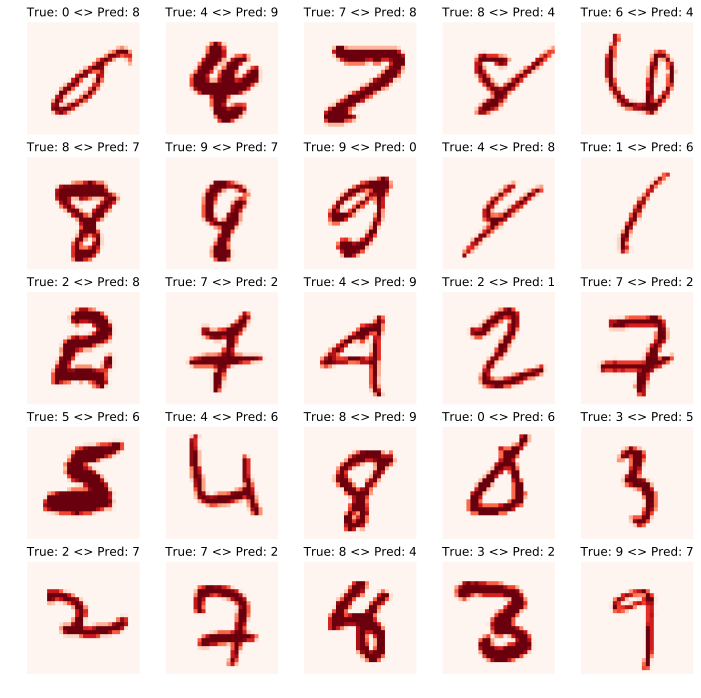

In [37]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')